# Take in data and creating a truncated dataset

In [66]:
#ONLY RUN THIS ONCE
import numpy as np
import pandas as pd
from astropy.io import ascii, fits
initial = 0

In [67]:
#We should have a way to skip this step if we want
speclist = open('testfile.txt','r+')

#This is the first run. Create functions to automate this.

# with open('C:\\Users\\Filip\\Jupyter\\specs\\textfile.txt', 'w') as speca:
#     for line in speclist:                             
#         if a < 5000:
#             speca.write('E:\\spectradata\\'+line)
#             a = a+1
# speclist.close()
# speca.close()

#This is the second run.

# with open('C:\\Users\\Filip\\Jupyter\\specs\\textfile.txt', 'w') as speca:
#     for line in speclist:
#         if a < 5000:   
#             if count != len(prune) and a == prune[count]:
#                 print(line)                                   #this line is just to skip the rows we don't want
#                 a+=1
#                 count+=1
#             else:
#                 speca.write('E:\\spectradata\\'+line)
#                 a = a+1
# speclist.close()
# speca.close()

def initialrun(numberofstars):
    a = 0
    with open('C:\\Users\\Filip\\Jupyter\\specs\\textfile.txt', 'w') as speca:
        for line in speclist:                             
            if a < numberofstars:
                speca.write('E:\\spectradata\\'+line)
                a += 1
    speclist.close()
    speca.close()
    return

def secondrun(numberofstars):
    a = 0
    count = 0
    with open('C:\\Users\\Filip\\Jupyter\\specs\\textfile.txt', 'w') as speca:
        for line in speclist:
            if a < 5000:   
                if count != len(prune) and a == prune[count]:
                    print(line)                                   #this line is just to skip the rows we don't want
                    a+=1
                    count+=1
                else:
                    speca.write('E:\\spectradata\\'+line)
                    a = a+1
    speclist.close()
    speca.close()
    return

In [68]:
# import Listcreater as lc
if initial == 0:
    initialrun(5000)
else:
    secondrun(5000)

a


In [ ]:
speclist = ascii.read('C:\\Users\\Filip\\Jupyter\\specs\\textfile.txt',format='no_header')

In [ ]:
spec_list = []
loglamdata = []

for i in range(0,len(speclist)):
    spec_list.append(np.array(fits.getdata(speclist[i][0],1)['flux']))          #USE THIS EXACTLY DONT MESS WITH IT
    loglamdata.append(np.array(fits.getdata(speclist[i][0],1)['loglam']))

In [ ]:
lengths = []
infimum = []
supremum = []
for i in range(0,len(loglamdata)):
    infimum.append(loglamdata[i][0])                            #List of all the first numbers
    lengths.append(len(loglamdata[i]))                          #Obviously the lengths
    supremum.append(loglamdata[i].max())   

print('#################################')
print("\nThis is the infimum", (np.array(infimum).max()))
print("\nThis is the supremum", (np.array(supremum).min()))
print("\nAnd finally the range is", (int(10000*(np.array(supremum).min()-np.array(infimum).max()))))
print('\n#################################')

In [ ]:
prune = []
print('############################################################')
print("Our troublesome infimum values are:")
supremumcounter = 0
infimumcounter = 0
rangeinfimum = 3.5877
rangesupremum = 3.96
for count in range(0,len(supremum)):
    if infimum[count] > rangeinfimum:
        supremumcounter+=1
        print(infimum[count], "  " ,count)
        prune.append(count)
print('############################################################')
print("Our troublesome supremum values are:")
for count in range(0,len(supremum)):
    if supremum[count] < rangesupremum:
        infimumcounter+=1
        print(supremum[count], "  ", count)
        prune.append(count)
print('############################################################')
print('If we use this range we are left with', int(10000*(rangesupremum-rangeinfimum)+1))

print('\nSupremum Count = ', supremumcounter)
print('Infimum Count = ', infimumcounter)

In [ ]:
prune = np.sort(prune)
prune

In [ ]:
Flux=pd.DataFrame(spec_list)

In [ ]:
Flux = Flux.T

In [ ]:
loglam = pd.DataFrame(loglamdata).T

In [ ]:
topcut = []
bottomcut = []
for count in range(0,len(supremum)):
    topcut.append(int(round(-10000*(loglamdata[count][0]-3.5877))))
    bottomcut.append(-int(round(-10000*(3.9600-loglamdata[count].max()))))

In [ ]:
bottomcutter = []
bottomcutter = [(lengths[i]+bottomcut[i]) for i in range(0,len(supremum))]         #Ready for the bottom

In [ ]:
fluxpinched = []
something = []
for count in range(0,len(supremum)):
    something = spec_list[count][:bottomcutter[count]]
    fluxpinched.append(something[topcut[count]:])

In [69]:
TruncatedDateset = pd.DataFrame(fluxpinched, columns = range(35877,39601,1))

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

sc = StandardScaler(with_std = False)
pca = PCA(n_components=2)

tran = sc.fit_transform(TruncatedDateset)
PC = pca.fit_transform(tran)

In [71]:
cov = (TruncatedDateset).dot((TruncatedDateset.T)) / (TruncatedDateset.T.shape[0]-1)
eig_vals, eig_vecs = np.linalg.eig(cov)
tot = sum(eig_vals)
var_exp = [(i / tot) for i in sorted(eig_vals, reverse=True)]

            0           1           2            3           4           5     \
0      37.348352   38.816744   65.121557    85.672270   27.273268   67.303011   
1      38.816744   54.704640   66.844454    86.812112   24.431020   70.934071   
2      65.121557   66.844454  116.909417   151.646098   48.646135  118.794911   
3      85.672270   86.812112  151.646098   200.910716   64.489973  156.323258   
4      27.273268   24.431020   48.646135    64.489973   22.177947   49.719905   
5      67.303011   70.934071  118.794911   156.323258   49.719905  123.306750   
6      37.080835   38.449872   65.451943    86.214263   27.544693   67.509919   
7      49.256287   42.072110   88.186927   117.013433   40.144234   89.779700   
8      78.465671   67.703959  140.824530   186.610391   63.705571  143.215670   
9      52.902818   41.446732   95.373126   127.260212   44.808478   96.572158   
10     69.124565   63.797111  123.038368   162.998075   54.417138  125.993216   
11     90.401262  102.834261

In [72]:
print("These are the first 7 Eigenvalues:")
[(print(eig_vals[count])) for count in range(0,7)]
print('##################################')
print("Eigenvalue Percentage:")
print("%.3f" %(var_exp[0]*100))
print("%.3f" %(var_exp[1]*100))

These are the first 7 Eigenvalues:
(46198099.40754162+0j)
(1794052.668538396+0j)
(101722.87035054392+0j)
(17489.36694212483+0j)
(7583.250473569417+0j)
(4299.387715532404+0j)
(3890.938480558561+0j)
##################################
Eigenvalue Percentage:
95.870
3.723


C:\Users\Filip\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
C:\Users\Filip\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [73]:
Prince = pd.DataFrame(PC,columns = ['Principal Component 1', 'Principal Component 2'])

In [74]:
# Prince.loc[:,'Principal Component 2']*=-1

Need to review the classification to find out more about what is going on.

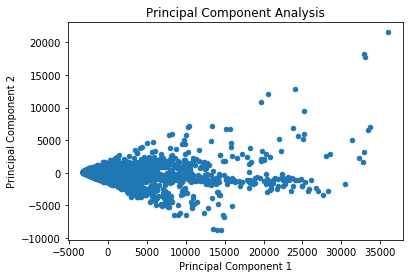

In [75]:
Prince.plot.scatter(x='Principal Component 1', y = 'Principal Component 2')
plt.title('Principal Component Analysis')
plt.show()

In [76]:
from sklearn.manifold import TSNE
TsneTest = TSNE(n_components=2).fit_transform(tran)

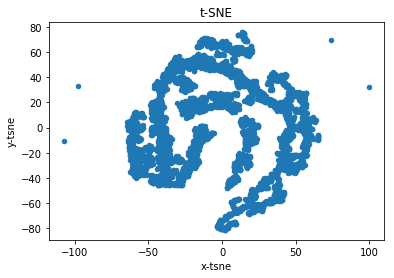

In [77]:
tSNEdata = pd.DataFrame(TsneTest,columns = ['x-tsne', 'y-tsne'])
tSNEdata.plot.scatter(x='x-tsne', y = 'y-tsne')
plt.title('t-SNE')
plt.show()

This seems great, still need to find out what each of the samples are.